1.Import packages

In [1]:
#dirty soln, but enables importing zfel to work.
import sys, os
parentdir = os.path.dirname(os.path.dirname(os.path.realpath('__file__')))
sys.path.append(parentdir) if parentdir not in sys.path else sys.path
print(sys.path)

['/Users/Sathya/Documents/SLAC/zfel/examples', '/Users/Sathya/anaconda3/envs/pyrecent/lib/python38.zip', '/Users/Sathya/anaconda3/envs/pyrecent/lib/python3.8', '/Users/Sathya/anaconda3/envs/pyrecent/lib/python3.8/lib-dynload', '', '/Users/Sathya/anaconda3/envs/pyrecent/lib/python3.8/site-packages', '/Users/Sathya/anaconda3/envs/pyrecent/lib/python3.8/site-packages/IPython/extensions', '/Users/Sathya/.ipython', '/Users/Sathya/Documents/SLAC/zfel']


In [2]:
import numpy as np
import scipy
from scipy import special
from zfel import general_load_bucket
import matplotlib.pyplot as plt

2.Input parameters

In [4]:
Nruns=1                             # Number of runs
npart   = 512                       # n-macro-particles per bucket 
s_steps = 200#31                    # n-sample points along bunch length
z_steps = 200#20                    # n-sample points along undulator
energy  = 4313.34*1E6               # electron energy [eV]
eSpread = 0#1.0e-4                  # relative rms energy spread [ ]
emitN   = 1.2e-6                    # normalized transverse emittance [m-rad]
currentMax = 3900                   # peak current [Ampere]
beta = 26                           # mean beta [meter]
unduPeriod = 0.03                   # undulator period [meter]
unduK = 3.5                         # undulator parameter, K [ ]
unduL = 70#30                       # length of undulator [meter]
radWavelength = 1.5e-9              # seed wavelength? [meter], used only in single-freuqency runs
dEdz = 0                            # rate of relative energy gain or taper [keV/m], optimal~130
iopt = 5                            # 5=SASE, 4=seeded
P0 = 10000*0.0                      # small seed input power [W]
constseed = 1                       # whether we want to use constant random seed for reproducibility, 1 Yes, 0 No
# particle information with positions in meter and gamma,\
# if we want to load random particle positions and energy, then set None
hist_rule='square-root'             # 'square-root' or 'sturges' or 'rice-rule' or 'self-design', number \
                                    #  of intervals to generate the histogram of gamma value in a bucket

3. Calculating intermediate parameters

In [5]:
mc2 = 0.51099906E6#510.99906E-3      # Electron rest mass in eV
gamma0  = energy/mc2                                    # central energy of the beam in unit of mc2
resWavelength = unduPeriod*(1+unduK**2/2.0)\
                    /(2*gamma0**2)                          # resonant wavelength
coopLength = resWavelength/unduPeriod                # cooperation length
gainLength = 1                                      # rough gain length
z0    = unduL/gainLength                                # wiggler length in units of gain length
delt  = z0/z_steps                                      # integration step in z0 ~ 0.1 gain length
dels  = delt                                            # integration step in s0 must be same as in z0 
s = np.arange(1,s_steps+1)*dels*coopLength*1.0e6        # longitundinal steps along beam in micron ? meter           
z = np.arange(1,z_steps+1)*delt*gainLength              # longitundinal steps along undulator in meter
bunchLength=s[-1]*1e-6


4. Generate particle profile

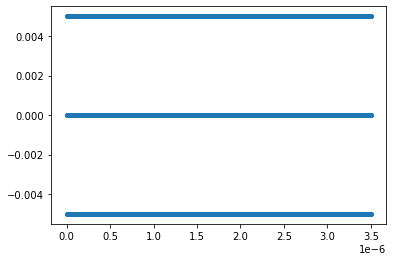

In [6]:
particle_num=npart*s_steps
s_all=np.random.rand(particle_num,1)*bunchLength
gam_all=np.zeros((particle_num,1))
gam_all[:int(particle_num/3),0]+=0.005
gam_all[int(2*particle_num/3):,0]-=0.005
weird_particle_position=np.concatenate((s_all,gam_all),axis=1)
plt.figure()
plt.plot(s_all,gam_all,'.')
np.savetxt("weird_particle_position.csv", weird_particle_position, delimiter=",")